In [2]:
import yfinance as yfin
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [4]:
TICKER_NAME = 'AAPL'

start_date = '2022-10-18'
end_date = '2023-10-18'

In [9]:
ticker = yfin.Ticker(TICKER_NAME)

ticker_info = ticker.info

ticker_history = ticker.history(interval='1d', start=start_date, end=end_date)

df = ticker_history.reset_index()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-10-18 00:00:00-04:00,144.631981,145.834836,139.780756,142.902237,99136600,0.0,0.0
1,2022-10-19 00:00:00-04:00,140.854396,144.095165,140.665514,143.011597,61758300,0.0,0.0
2,2022-10-20 00:00:00-04:00,142.176559,145.029629,141.808731,142.544373,64522000,0.0,0.0
3,2022-10-21 00:00:00-04:00,142.027429,146.978071,141.808725,146.401489,86548600,0.0,0.0
4,2022-10-24 00:00:00-04:00,146.321953,149.344018,145.138968,148.568619,75981900,0.0,0.0
...,...,...,...,...,...,...,...,...
246,2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0
247,2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,0.0
248,2023-10-13 00:00:00-04:00,181.419998,181.929993,178.139999,178.850006,51427100,0.0,0.0
249,2023-10-16 00:00:00-04:00,176.750000,179.080002,176.509995,178.720001,52517000,0.0,0.0


In [10]:
df = df[df.columns[:-2]]
df

,Date,Open,High,Low,Close,Volume
0,2022-10-18 00:00:00-04:00,144.631981,145.834836,139.780756,142.902237,99136600
1,2022-10-19 00:00:00-04:00,140.854396,144.095165,140.665514,143.011597,61758300
2,2022-10-20 00:00:00-04:00,142.176559,145.029629,141.808731,142.544373,64522000
3,2022-10-21 00:00:00-04:00,142.027429,146.978071,141.808725,146.401489,86548600
4,2022-10-24 00:00:00-04:00,146.321953,149.344018,145.138968,148.568619,75981900
...,...,...,...,...,...,...
246,2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100
247,2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100
248,2023-10-13 00:00:00-04:00,181.419998,181.929993,178.139999,178.850006,51427100
249,2023-10-16 00:00:00-04:00,176.750000,179.080002,176.509995,178.720001,52517000


In [13]:
dates = df[df.columns[0]]
dates[0]

Timestamp('2022-10-18 00:00:00-0400', tz='America/New_York')

In [14]:
dates = df[df.columns[0]]
_dates = []
for idx, date in enumerate(dates):
    # dates[idx] = date.split()[0]
    _dates.append(date.strftime("%Y-%m-%d"))

df[df.columns[0]] = _dates
df.head()

/var/folders/xx/x_6wt9hs2vq2twldfgptb5840000gn/T/ipykernel_78657/607492831.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[0]] = _dates


,Date,Open,High,Low,Close,Volume
0,2022-10-18,144.631981,145.834836,139.780756,142.902237,99136600
1,2022-10-19,140.854396,144.095165,140.665514,143.011597,61758300
2,2022-10-20,142.176559,145.029629,141.808731,142.544373,64522000
3,2022-10-21,142.027429,146.978071,141.808725,146.401489,86548600
4,2022-10-24,146.321953,149.344018,145.138968,148.568619,75981900


# Наложить на свечной график метки свечного паттерна Marubozu White/Back

In [ ]:
def marobuzu(df: pd.DataFrame, epsilon: float, window: int):
    for i in range(window, df.shape[0]):
        pass

In [15]:
def marobuzu(df, eps, window):
    df['marobuzu'] = 0
    for i in range(window, len(df)):
        sumt = abs(df.loc[i-window: i, 'Open'] - df.loc[i-window: i, 'Close']).sum()
        if ((abs(df.loc[i, 'High'] - df.loc[i, 'Low'] - df.loc[i, 'Open'] + df.loc[i, 'Close']) <= eps) 
            and (df.loc[i, 'Open'] + df.loc[i, 'Close']) > 3./2./window*sumt):
            df.loc[i, 'marobuzu'] = 1
    plt.figure(figsize=(10,3))
    plt.plot(df['Date'], df['marobuzu'], 'r--')
    plt.xlabel('Date')
    plt.ylabel('Marobuzu')

/var/folders/xx/x_6wt9hs2vq2twldfgptb5840000gn/T/ipykernel_78657/3543516843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marobuzu'] = 0


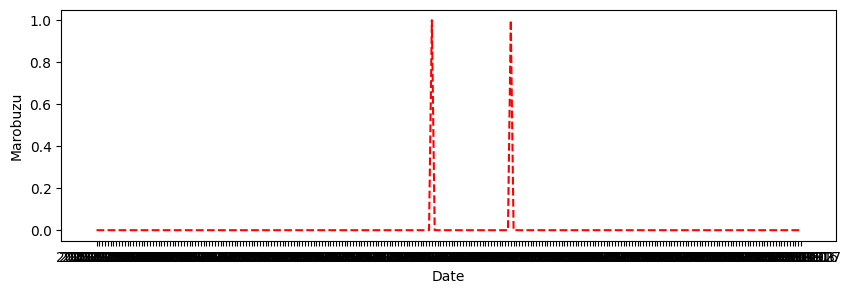

In [16]:
marobuzu(df, 0.3, 21)